In [ ]:
!pip install pyspark pandas numpy matplotlib seaborn jupyterlab

## Verinin İncelenmesi

In [33]:
from pyspark.sql import SparkSession

# SparkSession oluşturulması
spark = SparkSession.builder \
    .appName("California Housing Prices") \
    .getOrCreate()

# Veri dosyasının okunması 
df = spark.read.csv(r'C:\Users\acer\Desktop\sparke proje\ev\housing.csv', header=True, inferSchema=True)

# Verinin ilk 20 satırını gösterelim
df.show(10)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

In [34]:
# DataFrame'in şemasını (sütun isimleri ve veri tiplerini) ekrana yazdırır.
df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



In [35]:
# Toplam satır sayısını ekrana yazdırır.
print("Toplam satır sayısı:", df.count())

# 'ocean_proximity' sütununa göre gruplandırır ve her grup için 'median_house_value' ortalamasını hesaplayıp gösterir.
df.groupBy("ocean_proximity").mean("median_house_value").show()

# 'total_rooms' sütunu için temel istatistikleri (sayım, ortalama, std, min, max) gösterir.
df.select("total_rooms").describe().show()

# 'population' sütunu için temel istatistikleri gösterir.
df.select("population").describe().show()

# 'ocean_proximity' sütununda bulunan benzersiz değerleri gösterir.
df.select("ocean_proximity").distinct().show()

# 'ocean_proximity' sütununa göre gruplandırır ve her grubun sayısını gösterir.
df.groupBy("ocean_proximity").count().show()

# DataFrame'deki tüm kolon isimlerini ekrana yazdırır.
print("Kolonlar:", df.columns)

Toplam satır sayısı: 20640
+---------------+-----------------------+
|ocean_proximity|avg(median_house_value)|
+---------------+-----------------------+
|         ISLAND|               380440.0|
|     NEAR OCEAN|     249433.97742663656|
|       NEAR BAY|     259212.31179039303|
|      <1H OCEAN|     240084.28546409807|
|         INLAND|     124805.39200122119|
+---------------+-----------------------+

+-------+------------------+
|summary|       total_rooms|
+-------+------------------+
|  count|             20640|
|   mean|2635.7630813953488|
| stddev|2181.6152515827944|
|    min|               2.0|
|    max|           39320.0|
+-------+------------------+

+-------+------------------+
|summary|        population|
+-------+------------------+
|  count|             20640|
|   mean|1425.4767441860465|
| stddev|  1132.46212176534|
|    min|               3.0|
|    max|           35682.0|
+-------+------------------+

+---------------+
|ocean_proximity|
+---------------+
|         ISLAND

In [36]:
# Spark DataFrame'i Pandas DataFrame'e dönüştürür.
df_pandas = df.toPandas()

# Pandas DataFrame için temel istatistiksel özet bilgileri hesaplar.
desc = df_pandas.describe()
desc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Boş Değer Kontrolü

In [37]:
from pyspark.sql.functions import col, isnan, when, count
# Her sütundaki NaN veya NULL değerlerin sayısını hesaplar ve sonuçları ekrana yazdırır.
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|        0|       0|                 0|          0|           207|         0|         0|            0|                 0|              0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+



In [38]:
# 'total_bedrooms' sütununun temel istatistik özetini gösterir.
df.select("total_bedrooms").describe().show()

+-------+------------------+
|summary|    total_bedrooms|
+-------+------------------+
|  count|             20433|
|   mean| 537.8705525375618|
| stddev|421.38507007403115|
|    min|               1.0|
|    max|            6445.0|
+-------+------------------+



In [39]:
from pyspark.sql.functions import mean

# 'total_bedrooms' sütununun ortalama değerini hesaplar.
mean_val = df.select(mean(df["total_bedrooms"])).collect()[0][0]

# Eksik (NULL) 'total_bedrooms' değerlerini ortalama değerle doldurur.
df = df.na.fill({"total_bedrooms": mean_val})

In [40]:
from pyspark.sql.functions import col, isnan, when, count
# Her sütundaki NaN veya NULL değerlerin sayısını hesaplar ve sonuçları ekrana yazdırır.
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|        0|       0|                 0|          0|             0|         0|         0|            0|                 0|              0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+



## Kategorik Veriler

In [41]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# 1) StringIndexer: 'ocean_proximity' sütununu sayısal indekslere dönüştürür.
indexer = StringIndexer(inputCol="ocean_proximity", outputCol="ocean_proximity_index")
df_indexed = indexer.fit(df).transform(df)

# 2) OneHotEncoder: İndekslenmiş sütunu one-hot vektör formatına çevirir.
encoder = OneHotEncoder(
    inputCol="ocean_proximity_index", 
    outputCol="ocean_proximity_vec"
)
df_encoded = encoder.fit(df_indexed).transform(df_indexed)

# Dönüştürülmüş DataFrame'in ilk 2 satırını gösterir.
df_encoded.show(2)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+-------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|ocean_proximity_index|ocean_proximity_vec|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+-------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|                  3.0|      (4,[3],[1.0])|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|                  3.0|      (4,[3],[1.0])|
+---------+--------+------------------+-----------+--------------+----------+----------+------------

In [42]:
# 'ocean_proximity_index', 'ocean_proximity_vec' ve orijinal 'ocean_proximity' sütunlarını seçip ilk 10 satırı gösterir.
df_encoded.select("ocean_proximity_index", "ocean_proximity_vec", "ocean_proximity").show(10)

+---------------------+-------------------+---------------+
|ocean_proximity_index|ocean_proximity_vec|ocean_proximity|
+---------------------+-------------------+---------------+
|                  3.0|      (4,[3],[1.0])|       NEAR BAY|
|                  3.0|      (4,[3],[1.0])|       NEAR BAY|
|                  3.0|      (4,[3],[1.0])|       NEAR BAY|
|                  3.0|      (4,[3],[1.0])|       NEAR BAY|
|                  3.0|      (4,[3],[1.0])|       NEAR BAY|
|                  3.0|      (4,[3],[1.0])|       NEAR BAY|
|                  3.0|      (4,[3],[1.0])|       NEAR BAY|
|                  3.0|      (4,[3],[1.0])|       NEAR BAY|
|                  3.0|      (4,[3],[1.0])|       NEAR BAY|
|                  3.0|      (4,[3],[1.0])|       NEAR BAY|
+---------------------+-------------------+---------------+
only showing top 10 rows



In [43]:
from pyspark.ml.feature import VectorAssembler

# Belirtilen sütunları 'features' adlı tek bir sütunda birleştirir.
assembler = VectorAssembler(
    inputCols=[
        "longitude",
        "latitude",
        "housing_median_age",
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
        "median_income",
        "ocean_proximity_vec"  # OneHotEncoder çıktısı (vektör)
    ],
    outputCol="features"
)

# 'df_encoded' DataFrame'ine 'features' sütununu ekler.
df_assembled = assembler.transform(df_encoded)

# İlk 5 kaydı Pandas DataFrame'e çevirir.
df_assembled_pandas = df_assembled.limit(5).toPandas()

# Pandas DataFrame'i görüntüler.
df_assembled_pandas

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_index,ocean_proximity_vec,features
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3.0,"(0.0, 0.0, 0.0, 1.0)","[-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 12..."
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3.0,"(0.0, 0.0, 0.0, 1.0)","[-122.22, 37.86, 21.0, 7099.0, 1106.0, 2401.0,..."
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3.0,"(0.0, 0.0, 0.0, 1.0)","[-122.24, 37.85, 52.0, 1467.0, 190.0, 496.0, 1..."
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3.0,"(0.0, 0.0, 0.0, 1.0)","[-122.25, 37.85, 52.0, 1274.0, 235.0, 558.0, 2..."
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0,"(0.0, 0.0, 0.0, 1.0)","[-122.25, 37.85, 52.0, 1627.0, 280.0, 565.0, 2..."


In [44]:
# Yalnızca 'features' (girdi özellikleri) ve 'median_house_value' (hedef değişken) sütunlarını seçer.
final_df = df_assembled.select("features", "median_house_value")

# İlk 10 satırı ekrana yazdırır.
final_df.show(10)

+--------------------+------------------+
|            features|median_house_value|
+--------------------+------------------+
|[-122.23,37.88,41...|          452600.0|
|[-122.22,37.86,21...|          358500.0|
|[-122.24,37.85,52...|          352100.0|
|[-122.25,37.85,52...|          341300.0|
|[-122.25,37.85,52...|          342200.0|
|[-122.25,37.85,52...|          269700.0|
|[-122.25,37.84,52...|          299200.0|
|[-122.25,37.84,52...|          241400.0|
|[-122.26,37.84,42...|          226700.0|
|[-122.25,37.84,52...|          261100.0|
+--------------------+------------------+
only showing top 10 rows



## Veri Ayrımı 

In [45]:
# Veriyi %70 eğitim, %30 test olacak şekilde rastgele böler.
# 'seed' parametresi, bölmenin her çalıştırmada aynı sonucu vermesini sağlar.
train_data, test_data = final_df.randomSplit([0.7, 0.3], seed=42)

## Modellerin Eğitimi ve Eğitim - Test Sonuçları
### LinearRegression

In [46]:
from pyspark.ml.regression import LinearRegression

# Lineer regresyon modelini tanımlıyoruz (Girdi: 'features', Çıktı: 'median_house_value')
lr = LinearRegression(featuresCol="features", labelCol="median_house_value")

# Modeli eğitim verisi ile eğitiyoruz
lr_model = lr.fit(train_data)

# Modelin eğitim verisindeki performans özetini alıyoruz
training_summary = lr_model.summary

# RMSE (Kök Ortalama Kare Hatası) ve R² (Determinasyon Katsayısı) değerlerini yazdırıyoruz
print("Eğitim RMSE:", training_summary.rootMeanSquaredError)
print("Eğitim R²:", training_summary.r2)

Eğitim RMSE: 68512.27787438454
Eğitim R²: 0.6452128121552186


In [47]:
# Test verileri üzerinde modelin tahmin yapmasını sağlıyoruz
predictions = lr_model.transform(test_data)

# İlk 5 tahmin sonucunu (özellikler, gerçek değerler ve tahmin edilen değerler) gösteriyoruz
predictions.select("features", "median_house_value", "prediction").show(5)

from pyspark.ml.evaluation import RegressionEvaluator

# RMSE (Kök Ortalama Kare Hatası) metriğini kullanarak test hatasını hesaplıyoruz
evaluator = RegressionEvaluator(labelCol="median_house_value", predictionCol="prediction", metricName="rmse")
rmse_test = evaluator.evaluate(predictions)
print("Test RMSE:", rmse_test)

# R² (Determinasyon Katsayısı) metriğini kullanarak test skorunu hesaplıyoruz
evaluator_r2 = RegressionEvaluator(labelCol="median_house_value", predictionCol="prediction", metricName="r2")
r2_test = evaluator_r2.evaluate(predictions)
print("Test R²:", r2_test)

+--------------------+------------------+------------------+
|            features|median_house_value|        prediction|
+--------------------+------------------+------------------+
|[-124.3,41.84,17....|          103600.0|151110.67705187015|
|[-124.23,40.54,52...|          106700.0|217997.49068130786|
|[-124.23,41.75,11...|           73200.0|126089.77534607844|
|[-124.22,41.73,28...|           78300.0| 127464.0300675151|
|[-124.19,40.73,21...|           90100.0|195513.64038963057|
+--------------------+------------------+------------------+
only showing top 5 rows

Test RMSE: 69460.44327095662
Test R²: 0.642723157473533


### GBTRegressor

In [48]:
from pyspark.ml.regression import GBTRegressor

# Gradient Boosted Trees (GBT) regresyon modelini tanımlıyoruz
gbt = GBTRegressor(featuresCol="features", labelCol="median_house_value", maxIter=50)

# Modeli eğitim verisi ile eğitiyoruz
gbt_model = gbt.fit(train_data)

# Test verileri üzerinde modelin tahmin yapmasını sağlıyoruz
predictions_gbt = gbt_model.transform(test_data)

# İlk 5 tahmin sonucunu (özellikler, gerçek değerler ve tahmin edilen değerler) gösteriyoruz
predictions_gbt.select("features", "median_house_value", "prediction").show(5)

+--------------------+------------------+------------------+
|            features|median_house_value|        prediction|
+--------------------+------------------+------------------+
|[-124.3,41.84,17....|          103600.0| 114485.9303247943|
|[-124.23,40.54,52...|          106700.0| 79423.04882393911|
|[-124.23,41.75,11...|           73200.0| 99334.98665390421|
|[-124.22,41.73,28...|           78300.0| 85468.30835045512|
|[-124.19,40.73,21...|           90100.0|109690.74521079718|
+--------------------+------------------+------------------+
only showing top 5 rows



In [49]:
from pyspark.ml.evaluation import RegressionEvaluator

# Eğitim seti için model tahminlerini alıyoruz
train_predictions = gbt_model.transform(train_data)

# RMSE, R² ve MAE hesaplama için değerlendirme nesnelerini oluşturuyoruz
evaluator_rmse = RegressionEvaluator(labelCol="median_house_value", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="median_house_value", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="median_house_value", predictionCol="prediction", metricName="mae")

# Eğitim seti için model performansını hesaplıyoruz
train_rmse = evaluator_rmse.evaluate(train_predictions)
train_r2 = evaluator_r2.evaluate(train_predictions)
train_mae = evaluator_mae.evaluate(train_predictions)

# Eğitim seti sonuçlarını yazdırıyoruz
print("Eğitim Sonuçları:")
print("Eğitim RMSE:", train_rmse)
print("Eğitim R²:", train_r2)
print("Eğitim MAE:", train_mae)

# Test seti için model tahminlerini alıyoruz
test_predictions = gbt_model.transform(test_data)

# Test seti için model performansını hesaplıyoruz
print("Test Sonuçları:")
test_rmse = evaluator_rmse.evaluate(test_predictions)
test_r2 = evaluator_r2.evaluate(test_predictions)
test_mae = evaluator_mae.evaluate(test_predictions)

# Test seti sonuçlarını yazdırıyoruz
print("Test RMSE:", test_rmse)
print("Test R²:", test_r2)
print("Test MAE:", test_mae)


Eğitim Sonuçları:
Eğitim RMSE: 46765.09170512522
Eğitim R²: 0.8346992992486548
Eğitim MAE: 32708.567637337284
Test Sonuçları:
Test RMSE: 51786.55846112374
Test R²: 0.8014070315422004
Test MAE: 35787.334407101676


## Farklı Grafik Türleri ile Görselleştirme

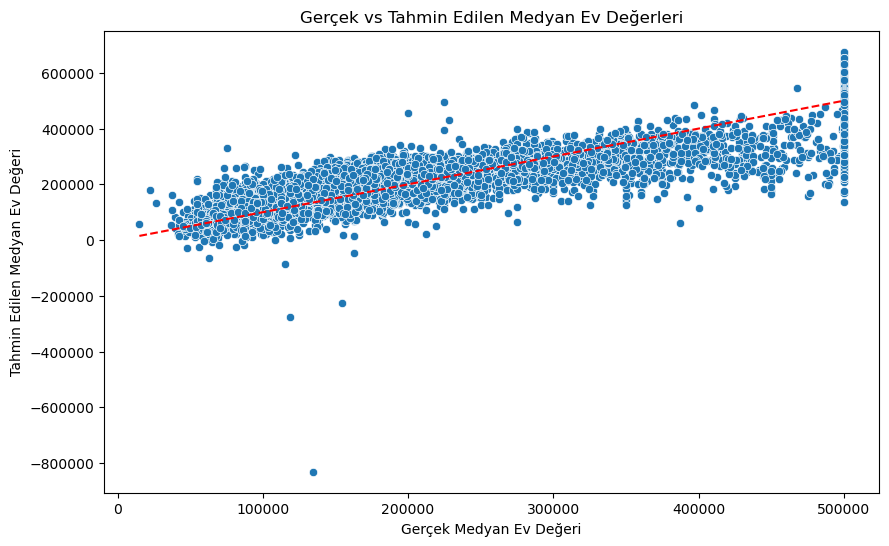

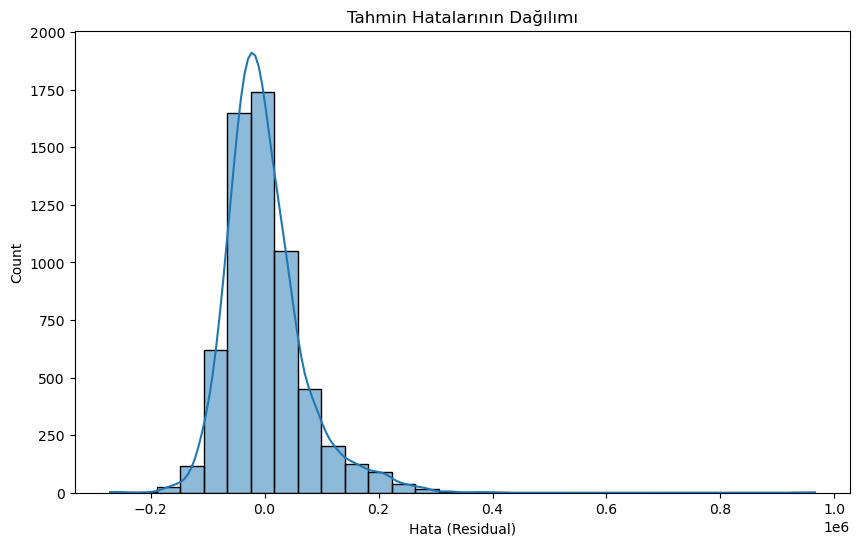

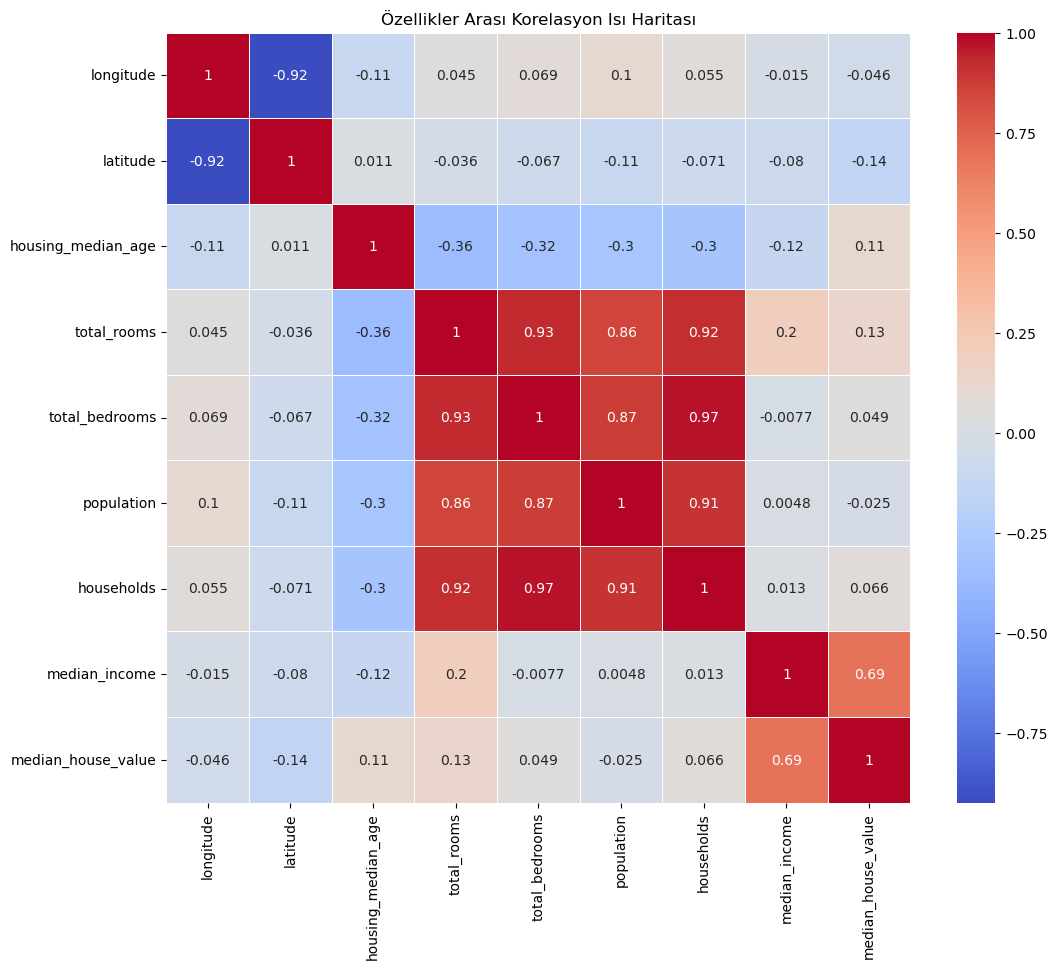

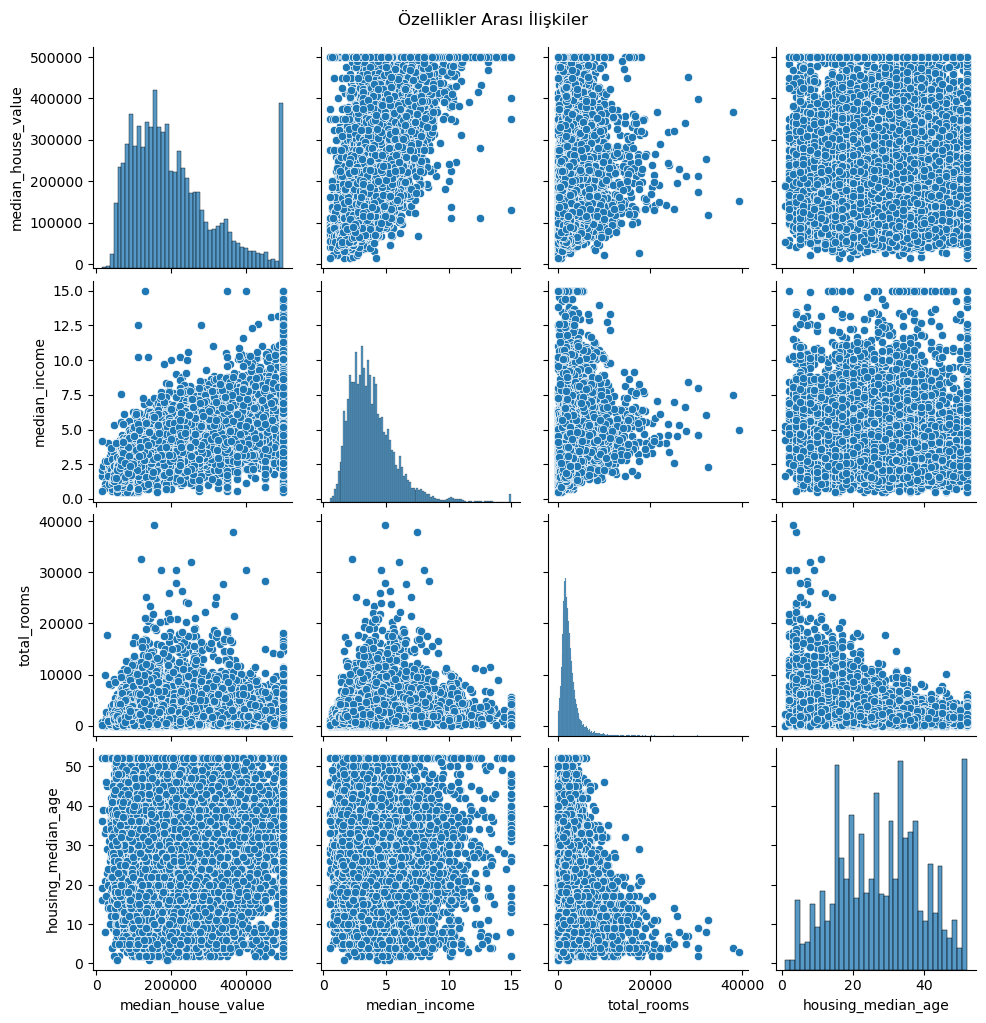

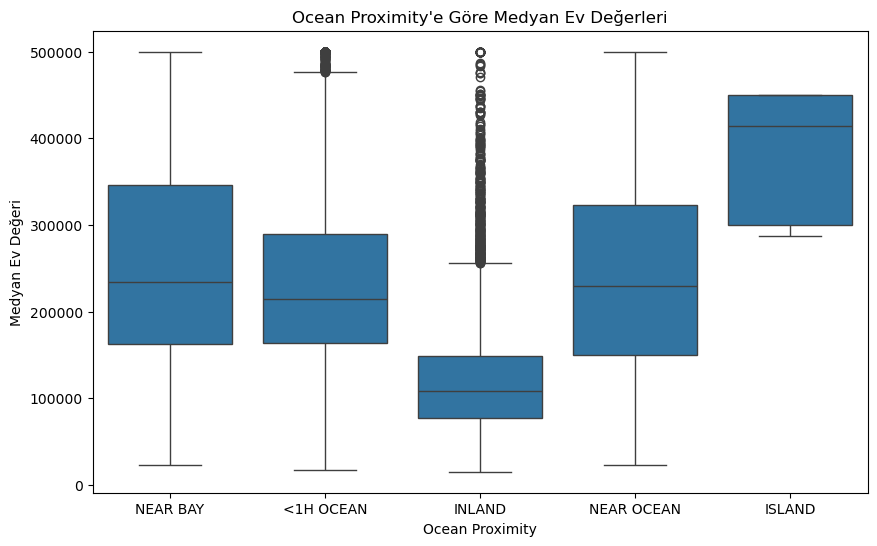

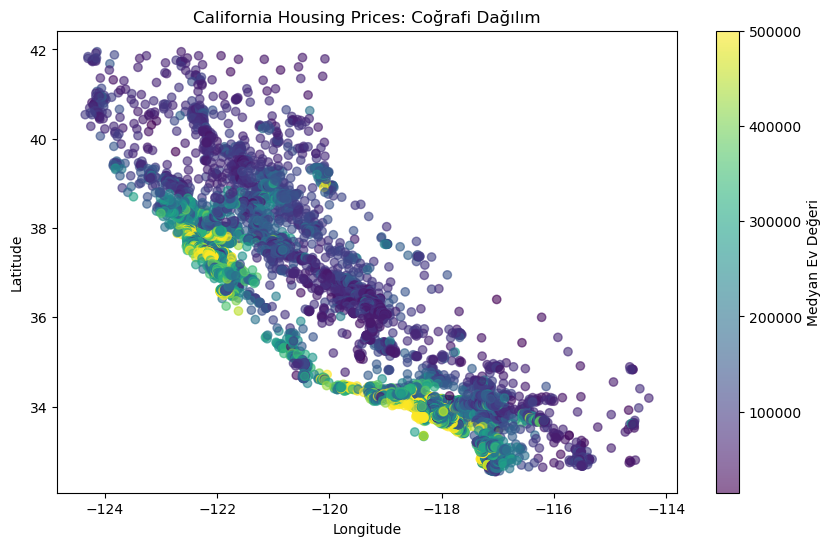

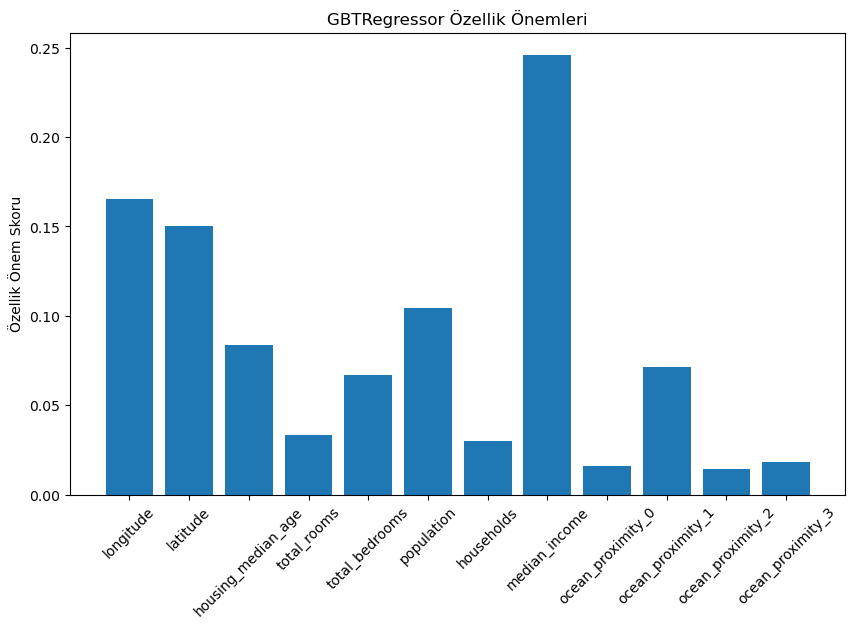

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql.functions import col
from pyspark.ml.evaluation import RegressionEvaluator

# Spark DataFrame'ini Pandas DataFrame'e dönüştürme
predictions_pd = predictions.toPandas()

# Gerçek ve tahmin edilen değerlerin scatter plot'u
plt.figure(figsize=(10,6))
sns.scatterplot(x="median_house_value", y="prediction", data=predictions_pd)
plt.xlabel("Gerçek Medyan Ev Değeri")
plt.ylabel("Tahmin Edilen Medyan Ev Değeri")
plt.title("Gerçek vs Tahmin Edilen Medyan Ev Değerleri")

# Doğru tahminler için referans çizgisi (y = x doğrusu)
min_val = predictions_pd["median_house_value"].min()
max_val = predictions_pd["median_house_value"].max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # Kırmızı kesikli çizgi

plt.show()

# Hata (residual) hesaplanması
predictions_pd["residual"] = predictions_pd["median_house_value"] - predictions_pd["prediction"]

# Residual (hata) dağılımını gösteren histogram
plt.figure(figsize=(10,6))
sns.histplot(predictions_pd["residual"], kde=True, bins=30)
plt.xlabel("Hata (Residual)")
plt.title("Tahmin Hatalarının Dağılımı")
plt.show()

# Spark DataFrame'inden gerekli sütunları Pandas DataFrame'e çevirme
numeric_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", 
                "total_bedrooms", "population", "households", "median_income", "median_house_value"]
df_pd = df.select(numeric_cols).toPandas()

# Korelasyon matrisi (Heatmap)
plt.figure(figsize=(12,10))
corr_matrix = df_pd.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Özellikler Arası Korelasyon Isı Haritası")
plt.show()

# Pairplot ile sayısal değişkenlerin dağılım ve ilişkilerini gösterme
sns.pairplot(df_pd[["median_house_value", "median_income", "total_rooms", "housing_median_age"]])
plt.suptitle("Özellikler Arası İlişkiler", y=1.02)
plt.show()

# Kategorik veri için Boxplot
df_pd_cat = df.select("ocean_proximity", "median_house_value").toPandas()
plt.figure(figsize=(10,6))
sns.boxplot(x="ocean_proximity", y="median_house_value", data=df_pd_cat)
plt.title("Ocean Proximity'e Göre Medyan Ev Değerleri")
plt.xlabel("Ocean Proximity")
plt.ylabel("Medyan Ev Değeri")
plt.show()

# Coğrafi dağılımın görselleştirilmesi
numeric_cols = ["longitude", "latitude", "median_house_value"]
df_pd = df.select(numeric_cols).toPandas()

plt.figure(figsize=(10,6))
sc = plt.scatter(df_pd["longitude"], df_pd["latitude"], 
                 c=df_pd["median_house_value"], cmap="viridis", alpha=0.6)
plt.colorbar(sc, label="Medyan Ev Değeri")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices: Coğrafi Dağılım")
plt.show()

# GBT modelinin özellik önemlerini elde etme
feature_importances = gbt_model.featureImportances.toArray()

# Özellik isimleri (OneHotEncoded özellikleri dahil)
numerical_feature_names = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income"
]

# OneHotEncoded kategorik özellikleri ekleme 
ocean_proximity_names = [
    "ocean_proximity_0",
    "ocean_proximity_1",
    "ocean_proximity_2",
    "ocean_proximity_3"
]

# Tüm özellik isimlerini birleştirme
all_feature_names = numerical_feature_names + ocean_proximity_names

# Özellik önemlerini gösteren bar grafiği çizme
plt.figure(figsize=(10,6))
plt.bar(all_feature_names, feature_importances)
plt.ylabel("Özellik Önem Skoru")
plt.title("GBTRegressor Özellik Önemleri")
plt.xticks(rotation=45)
plt.show()
